In [1]:
# Lertas Giorgos 

# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from platform import python_version
python_version()

'3.8.13'

### 1. Interractions dataframe

In [2]:
# read file with interractions and remove column with side effect polypharmacy code, because we have the names
combo=pd.read_csv('data/bio-decagon-combo.csv')
combo2 = combo.drop('Polypharmacy Side Effect', axis=1)

# Also, replace blank spaces, in names, with underscore
combo2['Side Effect Name'] = combo2['Side Effect Name'].str.replace(' ','_')
combo2

,STITCH 1,STITCH 2,Side Effect Name
0,CID000002173,CID000003345,hypermagnesemia
1,CID000002173,CID000003345,retinopathy_of_prematurity
2,CID000002173,CID000003345,atelectasis
3,CID000002173,CID000003345,alkalosis
4,CID000002173,CID000003345,Back_Ache
...,...,...,...
4649436,CID000003461,CID000003954,deep_vein_thromboses
4649437,CID000003461,CID000003954,rhabdomyolysis
4649438,CID000003461,CID000003954,loss_of_weight
4649439,CID000003461,CID000003954,ascites


,Side Effect Name
arterial_pressure_NOS_decreased,28568
anaemia,27006
Difficulty_breathing,26037
nausea,25190
neumonia,24430
Fatigue,24260
Pain,23894
diarrhea,23848
asthenia,23515
emesis,23043


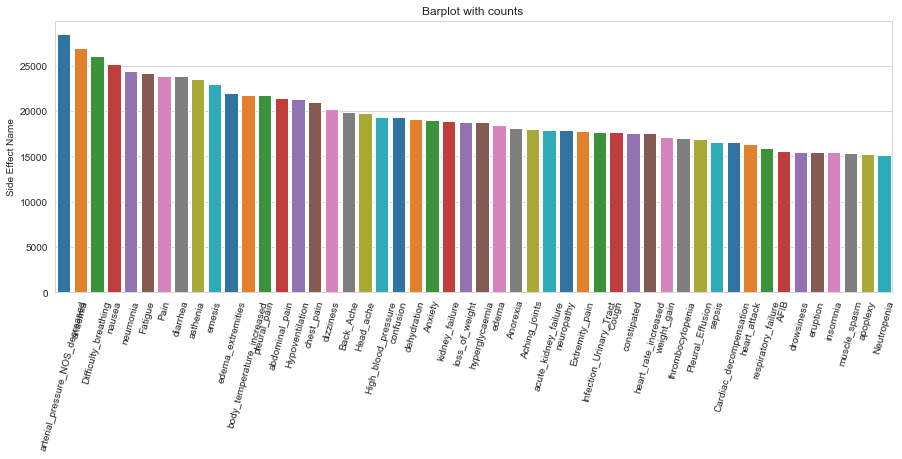

In [3]:
# counter of values at Side Effect Name column 
count_effects = pd.DataFrame(combo2['Side Effect Name'].value_counts())

# create a barplot with counts
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
plt.title('Barplot with counts ')
sns.barplot(x=count_effects.head(50).index, y='Side Effect Name', data=count_effects.head(50), palette='tab10')
plt.xticks(rotation=75);

# print leaderbord with names
count_effects[:15]

In [4]:
# create graph and print leaderboard with entities how many times they appear
import networkx as nx
G = nx.Graph()
G = nx.from_pandas_edgelist(combo2, 'STITCH 1', 'STITCH 2', True)

leaderboard = {}
df = pd.concat([combo2['STITCH 1'],combo2['STITCH 2']]).unique()
for x in G.nodes:
    leaderboard[x] = len(G[x])
s = pd.Series(leaderboard, name='connections')
leaderboard = s.to_frame().sort_values('connections', ascending=False)

# print leaderbord with names
leaderboard[:20]

# print graph
# from matplotlib.pyplot import figure
# figure(figsize=(10, 8))
# nx.draw_shell(G, with_labels=True)

,connections
CID000004594,599
CID000001983,578
CID000000853,576
CID000003883,552
CID000005039,549
CID000003958,544
CID000005732,537
CID000004679,537
CID000054454,537
CID000002771,536


In [5]:
# leaderbord with unique interactions how many times they appear 
inters = combo2[['STITCH 1','STITCH 2']].groupby(['STITCH 1', 'STITCH 2']).value_counts()
inters = pd.DataFrame(inters)
inters.columns = ['connections']
inters.sort_values('connections', ascending=False)[:20]

,,connections
STITCH 1,STITCH 2,
CID000003883,CID000004594,540
CID000002662,CID000003883,524
CID000004594,CID000005090,494
CID000005090,CID000005732,478
CID000002662,CID000003446,476
CID000002678,CID000004900,468
CID000003958,CID000005090,466
CID000004900,CID000005090,465
CID000002662,CID000004900,462


### 2. Disease Classes dataframe

In [6]:
# read file with subcategories, which called Disease class
effectcategories=pd.read_csv('data/bio-decagon-effectcategories.csv')
effectcategories

,Side Effect,Side Effect Name,Disease Class
0,C0017152,gastric inflammation,gastrointestinal system disease
1,C0027858,neuroma,benign neoplasm
2,C0041466,Typhoid,bacterial infectious disease
3,C0032807,Post thrombotic syndrome,cardiovascular system disease
4,C0033860,psoriasis,integumentary system disease
...,...,...,...
556,C0001816,agnosia,developmental disorder of mental health
557,C0302592,carcinoma of the cervix,cancer
558,C0270629,epidural abscess,nervous system disease
559,C0038220,status epilepticus,nervous system disease


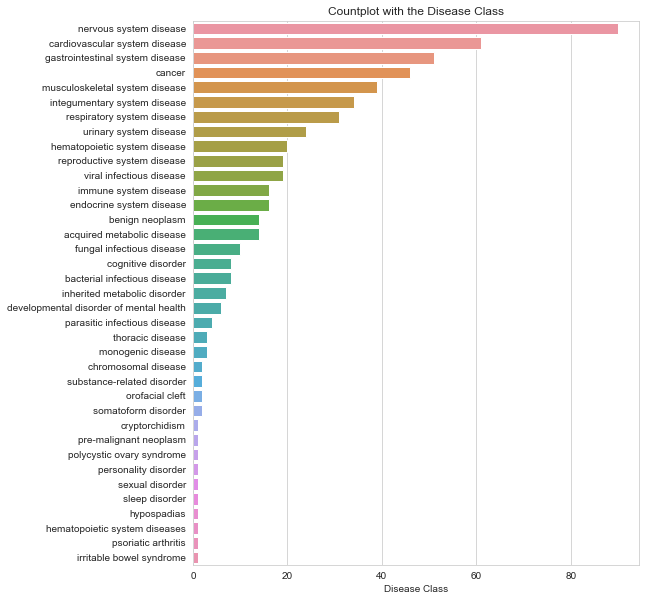

In [7]:
# counter of values at Disease Class column 
count_eff_cat = pd.DataFrame(effectcategories['Disease Class'].value_counts())

# Create a count chart
plt.figure(figsize=(8,10))
plt.title('Countplot with the Disease Class')
sns.barplot(x='Disease Class',y=count_eff_cat.index,data=count_eff_cat);

In [8]:
# merge file with connections with Disease class
combo2.merge(effectcategories, on='Side Effect Name').drop('Side Effect',axis=1)

,STITCH 1,STITCH 2,Side Effect Name,Disease Class
0,CID000002173,CID000003345,peliosis,hematopoietic system disease
1,CID000001302,CID000005064,peliosis,hematopoietic system disease
2,CID000002520,CID000060852,peliosis,hematopoietic system disease
3,CID000000596,CID000667490,peliosis,hematopoietic system disease
4,CID000005245,CID000005656,peliosis,hematopoietic system disease
...,...,...,...,...
827867,CID000004205,CID000034312,Rubella,viral infectious disease
827868,CID000004900,CID000005090,Rubella,viral infectious disease
827869,CID000002554,CID000028112,Rubella,viral infectious disease
827870,CID000004112,CID000004900,Rubella,viral infectious disease


### 3. DGL-KE

In [9]:
import os 

path = '/Users/giorgoslertas/Desktop/Lertas_files/data_science/Thesis/ddi_pred'
os.chdir(path)    # os.getcwd() current working file

# # create train, test and valid 
# train=combo2.sample(frac=0.8)
# test=combo2.drop(list(train.index.values), axis=0)
# valid=test.sample(frac=0.5)
# test=test.drop(list(valid.index.values), axis=0)

# extract train file as text
combo2.to_csv('dgl-ke/train.txt', header=None, index=None, sep=',')
# test.to_csv('test.txt', header=None, index=None, sep=',')
# valid.to_csv('valid.txt', header=None, index=None, sep=',')

# relations = pd.DataFrame(combo2['Side Effect Name'].unique())
# entities = pd.DataFrame(pd.concat([combo2['STITCH 1'],combo2['STITCH 2']]).unique())
# relations.to_csv('relations.txt', header=None, sep=',')
# entities.to_csv('entities.txt', header=None, sep=',')

####extra

--log_interval 1000 \
--neg_sample_size 200 --regularization_coef = 1e-9 --hidden_dim 400 --gamma 19,9 \
--lr 0,25 --batch_size_eval 16 --test -adv --gpu 0 --max_step 24000

In [10]:
import json
  
# Opening json file
f = open('ckpts/TransE_ddi_pr_0/config.json')
  
# returns json object as a dictionary
model = json.load(f)
model

{'dataset': 'ddi_pr',
 'model': 'TransE',
 'emb_size': 400,
 'max_train_step': 80000,
 'batch_size': 1024,
 'neg_sample_size': 256,
 'lr': 0.01,
 'gamma': 12.0,
 'double_ent': False,
 'double_rel': False,
 'neg_adversarial_sampling': False,
 'adversarial_temperature': 1.0,
 'regularization_coef': 2e-06,
 'regularization_norm': 3,
 'emap_file': 'entities.tsv',
 'rmap_file': 'relations.tsv'}

In [11]:
# read files with names, that export with the code in cmd from dgl-ke
entities = pd.read_csv('dgl-ke/entities.tsv', names = ['names'], index_col=None)
relations = pd.read_csv('dgl-ke/relations.tsv', names = ['names'], index_col=None)

# read files with embeddings, that export with the code in cmd from dgl-ke
entities_emb = np.load('ckpts/TransE_ddi_pr_0/ddi_pr_TransE_entity.npy')
relations_emb = np.load('ckpts/TransE_ddi_pr_0/ddi_pr_TransE_relation.npy')

Embeddings :

entities_emb.shape
(645, 400)

relations_emb.shape
(1317, 400)

### 4. Create X

In [12]:
# 1. Select rows with top 5 relations                             # 131.231
top5 = combo2[combo2['Side Effect Name'].isin(['arterial_pressure_NOS_decreased','anaemia',
                                               'Difficulty_breathing','nausea','neumonia'])]
# 2. find number of unique rows                                   # 54.449
top5_uni = top5[['STITCH 1','STITCH 2']].drop_duplicates()
# 3. sampling 10% of the unique interractions                      # 5.445
X_names = top5_uni.sample(frac=0.1)
X_names.sort_values(by=['STITCH 1','STITCH 2'])
X_names = X_names.reset_index().drop('index', axis=1)
X_names

,STITCH 1,STITCH 2
0,CID000003696,CID000004771
1,CID000008953,CID000064147
2,CID000004595,CID000119182
3,CID000000564,CID000150311
4,CID000003954,CID000005647
...,...,...
5440,CID000004845,CID000005732
5441,CID000000772,CID005329102
5442,CID000004856,CID000005512
5443,CID000041774,CID000077999


In [13]:
# function to create X values 
def export_X(X):
    
    # for each drug, add embeddings from the exported file of dgl-ke
    x1 = [entities_emb[entities[entities.names == i].index] for i in X['STITCH 1']]
    x2 = [entities_emb[entities[entities.names == i].index] for i in X['STITCH 2']]
    
    # reshape all to 2d matrix
    x1 = np.reshape(x1, (len(x1), 400))
    x2 = np.reshape(x2, (len(x2), 400))
    
    # create X values with concatenation of 2 files with interracted drugs
    x = [np.concatenate([sub1,sub2]) for sub1, sub2 in zip(x1, x2)]
    x = pd.DataFrame(np.transpose(x))
    
    return x

X ∈ R (d×m)  ...  where d is the dimensionality of the data, and m is the number of instances.

In [14]:
X = export_X(X_names)
X

,0,1,2,3,4,5,6,7,8,9,...,5435,5436,5437,5438,5439,5440,5441,5442,5443,5444
0,-0.483962,-0.129399,0.351932,-0.478819,0.082832,0.211700,0.400621,-0.452968,0.368524,0.279421,...,-0.473983,0.541856,0.356336,-0.399231,-0.403406,0.380953,-0.208003,-0.372188,0.474155,-0.091214
1,0.380627,-0.124080,-0.021304,-0.477971,-0.162167,-0.431365,0.016029,-0.365220,-0.111131,-0.184270,...,-0.242497,0.111582,0.242962,-0.514875,0.026765,0.517136,-0.202796,0.488970,-0.423708,-0.160929
2,0.239586,0.485894,-0.390250,0.425081,0.273061,-0.515130,0.426118,0.235598,-0.338774,-0.398434,...,0.552229,0.180626,0.096113,0.484460,-0.435012,0.396549,0.179136,-0.531915,-0.330500,-0.458237
3,0.461629,0.656596,-0.369253,-0.768791,-0.260409,-0.110912,0.470999,-0.263091,0.059008,-0.443996,...,-0.433254,-0.205695,-0.074004,-0.542838,0.489568,0.521789,0.054943,0.366204,0.665659,-0.350703
4,-0.428296,0.374814,-0.180710,0.690744,-0.400353,0.640247,-0.538121,0.374828,-0.405933,-0.086429,...,-0.365783,-0.298576,0.648651,-0.209865,0.441174,0.212905,0.792894,0.349540,-0.598358,0.456550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,-0.524640,0.279813,-0.639991,-0.290124,-0.354391,-0.520281,-0.500544,0.421499,-0.474442,-0.570283,...,-0.243127,0.228259,0.220599,0.228259,-0.323225,0.054385,-0.408435,0.377284,0.230546,0.471061
796,-0.424989,-0.463685,-0.435632,0.322978,-0.416069,-0.486280,-0.468801,-0.319060,-0.382991,-0.220647,...,-0.341046,-0.429810,-0.432371,-0.429810,0.018462,-0.203023,0.485208,0.382096,0.346229,-0.648457
797,-0.624289,0.283017,-0.533132,0.514415,-0.435840,-0.265114,-0.573435,-0.385483,-0.488856,0.240430,...,0.440608,0.243376,0.454664,0.243376,-0.402424,0.176289,0.466285,0.303767,-0.398115,-0.557168
798,0.447881,0.296701,-0.531006,-0.429900,-0.547075,-0.518450,-0.507635,0.328404,-0.283695,0.068355,...,-0.358290,-0.592389,0.570551,-0.592389,0.241867,-0.017671,0.504784,0.032765,-0.406442,0.217277


### 5. Create Y

Y ∈ {−1, 1}m×z  ...  m is the number of instances, and z the classes. 

In [15]:
Y_names = top5.set_index(['STITCH 1','STITCH 2'])['Side Effect Name'].str.get_dummies().groupby(['STITCH 1','STITCH 2']).max()
Y = Y_names.reset_index()
Y = pd.merge(X_names, Y, on=['STITCH 1', 'STITCH 2'])
Y = Y.drop(['STITCH 1', 'STITCH 2'], axis=1)
Y[Y == 0] = -1
Y

,Difficulty_breathing,anaemia,arterial_pressure_NOS_decreased,nausea,neumonia
0,-1,-1,1,-1,-1
1,-1,-1,1,-1,1
2,-1,-1,1,-1,1
3,-1,1,-1,1,-1
4,-1,1,1,1,1
...,...,...,...,...,...
5440,1,-1,1,-1,-1
5441,1,1,-1,-1,1
5442,-1,1,-1,1,-1
5443,1,-1,-1,-1,1


### 6. Biobert & create S

In [16]:
# read file with biobert embeddings
bio_embs = pd.read_csv('bio_embeddings/embeddings.csv')

# Also, replace blank spaces, in names, with underscore
bio_embs['relations'] = bio_embs['relations'].str.replace(' ','_')
bio_embs

,relations,0,1,2,3,4,5,6,7,8,...,758,759,760,761,762,763,764,765,766,767
0,hypermagnesemia,0.088074,-0.055262,0.134172,-0.090707,-0.217207,-0.186781,-0.024032,0.277330,-0.402590,...,-0.019452,0.041471,-0.132348,0.132115,0.058661,-0.038794,0.426149,-0.036876,0.008565,-0.018814
1,retinopathy_of_prematurity,-0.329204,-0.016536,-0.008062,-0.088111,-0.031477,0.122630,0.049380,0.333087,0.086270,...,0.262807,-0.204477,-0.151278,0.117630,-0.093622,0.347138,0.118548,0.121198,-0.101342,0.112632
2,atelectasis,0.337109,0.010530,-0.172739,-0.210605,-0.393780,0.200895,-0.042212,0.144598,0.009641,...,0.042049,0.320456,-0.048014,0.176009,-0.156481,0.055710,-0.020731,-0.098135,-0.100952,-0.130569
3,alkalosis,-0.030430,-0.245631,-0.131618,-0.060774,-0.252524,-0.061352,-0.022995,0.242525,-0.050651,...,-0.166825,0.331410,-0.333679,0.108219,-0.322264,0.192892,0.117852,-0.000722,0.085849,0.206449
4,Back_Ache,0.391526,0.112049,-0.280322,0.024567,-0.451858,0.025522,0.027804,0.164017,0.156766,...,-0.257412,0.301215,-0.090434,-0.024340,-0.008226,0.174115,0.337543,-0.207418,0.078398,-0.024546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312,splinter,0.155755,-0.201958,0.014882,0.001103,-0.050607,-0.196756,0.011838,0.200970,-0.065509,...,0.018151,0.447372,-0.203281,0.163940,-0.162343,-0.110279,0.493734,-0.063204,0.200920,0.206374
1313,hypogonadotropic_hypogonadism,-0.079468,0.113548,0.425801,0.017825,-0.122827,-0.063751,0.088885,0.355229,-0.302494,...,0.118147,-0.336383,-0.143909,0.218631,0.009120,-0.351169,0.614995,0.158766,0.230997,-0.420567
1314,chloasma,0.321892,-0.576645,-0.075235,-0.221101,-0.109898,-0.121364,0.271159,0.132595,0.183179,...,-0.098797,-0.069401,0.007005,0.049545,-0.095278,0.033671,0.343034,0.083172,0.029176,-0.170607
1315,estrogen_replacement,0.123171,-0.072414,-0.023643,0.366200,-0.371677,0.151155,0.056889,0.007559,-0.112339,...,-0.165975,0.068254,-0.359026,0.376346,-0.047277,0.041628,0.645992,-0.096540,0.244447,-0.328027


S ∈ [0,1]a×z  ...  there are z classes, each of them having a signature composed of a attributes.

In [17]:
# collect only the relations that we use and transpose them because of  S ∈ a×z
S = bio_embs[bio_embs['relations'].isin(['arterial_pressure_NOS_decreased','anaemia',
                                               'Difficulty_breathing','nausea','neumonia'])].T
S

,29,51,68,74,361
relations,Difficulty_breathing,arterial_pressure_NOS_decreased,neumonia,anaemia,nausea
0,-0.249892,-0.058238,0.147399,0.106161,0.27445
1,0.030361,-0.273673,0.026532,0.094563,-0.029486
2,-0.035144,-0.102084,-0.234816,0.031915,-0.331503
3,-0.267908,0.041894,-0.139893,0.035245,-0.219903
...,...,...,...,...,...
763,0.492388,0.04101,0.35645,0.440824,0.305742
764,0.017255,-0.020288,-0.140148,0.138147,-0.023207
765,0.047133,-0.157604,-0.044005,-0.423736,-0.506835
766,0.40698,-0.134091,-0.21131,0.135746,0.197422


In [18]:
S.columns = S.loc['relations'].values
S = S.drop(index=('relations'))
S = S[Y.columns]#.astype(float)
S

,Difficulty_breathing,anaemia,arterial_pressure_NOS_decreased,nausea,neumonia
0,-0.249892,0.106161,-0.058238,0.27445,0.147399
1,0.030361,0.094563,-0.273673,-0.029486,0.026532
2,-0.035144,0.031915,-0.102084,-0.331503,-0.234816
3,-0.267908,0.035245,0.041894,-0.219903,-0.139893
4,-0.135543,-0.335823,-0.116004,-0.461992,-0.456806
...,...,...,...,...,...
763,0.492388,0.440824,0.04101,0.305742,0.35645
764,0.017255,0.138147,-0.020288,-0.023207,-0.140148
765,0.047133,-0.423736,-0.157604,-0.506835,-0.044005
766,0.40698,0.135746,-0.134091,0.197422,-0.21131


### 7. function for V

W = V * S.T, where V ∈ R(d×a) (d=800(dd_emb->400*2), a=768(biobert embeddings))

In [19]:
# function to calculate V values
def calculate_V(X,Y,S,gamma=1,lamda=1):
    
    # create I table with len(X) dimensions. I table has on the diagonal of the ace and the other numbers are 0
    I = np.eye(len(X))
    part_1 = np.linalg.inv((X.dot(X.T)+gamma*I))

    # fix columns be in same row as Y columns
    S = S[Y.columns].astype(float)
    part_2 = X.dot(Y).dot(S.T)
    
    # create I table with len(S) dimensions. I table has on the diagonal of the ace and the other numbers are 0
    I = np.eye(len(S))
    part_3 = np.linalg.inv((S.dot(S.T)+lamda*I))
    
    # calculate V
    V = part_1.dot(part_2).dot(part_3)
    V = pd.DataFrame(V)
    
    return V

In [20]:
V = calculate_V(X,Y,S)
V

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.001495,-0.000175,-0.000489,0.000663,-0.000878,0.001634,0.000124,0.000156,-0.000321,-0.001302,...,-0.000300,-0.000670,0.000083,-0.000777,0.001220,-0.000630,-0.000011,-0.001537,-0.001229,-0.000497
1,-0.000885,0.001225,-0.001069,-0.002944,-0.000402,-0.000256,-0.001859,-0.000731,0.001590,-0.000340,...,0.000204,0.000208,0.001388,0.003328,-0.000184,0.001978,-0.000835,0.002145,0.002725,0.001848
2,-0.003346,0.001962,0.002651,-0.000848,0.001713,-0.005362,0.000521,-0.001970,0.001430,0.003527,...,0.000521,-0.000071,0.001104,0.003235,-0.002912,0.003209,0.001233,0.002378,0.004106,0.001530
3,0.002432,-0.002713,-0.002137,0.001140,-0.000663,0.003705,-0.000807,0.001699,-0.000714,-0.002049,...,-0.001308,0.001658,-0.003064,-0.004660,0.001360,-0.003670,-0.000728,-0.002738,-0.003174,-0.001985
4,0.001047,0.000743,-0.000072,-0.000189,-0.000934,-0.000284,-0.000921,-0.001636,0.001884,-0.000508,...,-0.001450,-0.000235,-0.000276,0.000370,0.000169,0.001037,0.000759,-0.002431,0.001724,0.000146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,-0.002001,-0.001154,0.000003,-0.000507,0.001763,-0.000882,-0.000040,0.001302,-0.000815,0.001491,...,0.000843,0.001726,-0.001072,-0.000771,-0.001436,-0.001135,-0.000703,0.002822,-0.000237,0.000034
796,0.001515,0.002689,0.000235,-0.000357,-0.002214,0.001166,0.000806,-0.001122,-0.000174,-0.001976,...,0.000934,-0.003734,0.004270,0.003974,0.002327,0.002716,0.000145,-0.000409,0.000100,0.001216
797,-0.000544,-0.000122,0.000526,0.000135,0.000608,-0.001335,-0.000263,-0.000618,0.000830,0.000978,...,-0.000636,0.000752,-0.001023,-0.000532,-0.001016,0.000081,0.000540,-0.000479,0.001107,-0.000094
798,-0.001995,0.000070,0.000687,-0.000439,0.000953,-0.001599,0.000880,0.000797,-0.001066,0.001536,...,0.001331,0.000357,0.000645,0.001130,-0.001114,0.000677,-0.000365,0.002874,0.000005,0.000348


### 8. Prediction

In [21]:
# sample from data 
x_sample = X_names.sample(1) #.drop(top5_sample.index, axis=0)
# export X values from the sample
x = export_X(x_sample)
# calculate the preds the sample
values = x.T.dot(V).dot(S.values)
values.columns = S.columns
values

,Difficulty_breathing,anaemia,arterial_pressure_NOS_decreased,nausea,neumonia
0,-0.166644,0.148474,-0.436937,1.129638,-0.980637


In [22]:
# prin the max 
values.iloc[:,[np.argmax(values)]]

,nausea
0,1.129638


In [23]:
values.T.sort_values(by =0 ,axis =0, ascending=False)

,0
nausea,1.129638
anaemia,0.148474
Difficulty_breathing,-0.166644
arterial_pressure_NOS_decreased,-0.436937
neumonia,-0.980637


In [24]:
x_sample

,STITCH 1,STITCH 2
923,CID000004856,CID000119607


In [25]:
# find the rows in data with the sample's drugs
combo2[(combo2['STITCH 1']==x_sample['STITCH 1'].iloc[0]) & (combo2['STITCH 2']==x_sample['STITCH 2'].iloc[0])]

,STITCH 1,STITCH 2,Side Effect Name
1352017,CID000004856,CID000119607,abnormal_ECG
1352018,CID000004856,CID000119607,bursitis
1352019,CID000004856,CID000119607,cellulitis
1352020,CID000004856,CID000119607,agitated
1352021,CID000004856,CID000119607,Back_Ache
...,...,...,...
1352083,CID000004856,CID000119607,infection
1352084,CID000004856,CID000119607,nasal_sinus_congestion
1352085,CID000004856,CID000119607,Bladder_inflammation
1352086,CID000004856,CID000119607,osteoporosis


In [26]:
# add a number from the indices of the drugs 
x_sample = pd.DataFrame(combo2.iloc[1352084]).T

f = combo2.loc[combo2['STITCH 1'].isin(x_sample['STITCH 1']) & combo2['STITCH 2'].isin(x_sample['STITCH 2'])]
f[f['Side Effect Name'].isin(['arterial_pressure_NOS_decreased','anaemia',
                                               'Difficulty_breathing','nausea','neumonia'])]

,STITCH 1,STITCH 2,Side Effect Name
1352074,CID000004856,CID000119607,nausea
1352082,CID000004856,CID000119607,arterial_pressure_NOS_decreased


### 9. NN

In [27]:
test = Y.replace(-1, 0)
test

,Difficulty_breathing,anaemia,arterial_pressure_NOS_decreased,nausea,neumonia
0,0,0,1,0,0
1,0,0,1,0,1
2,0,0,1,0,1
3,0,1,0,1,0
4,0,1,1,1,1
...,...,...,...,...,...
5440,1,0,1,0,0
5441,1,1,0,0,1
5442,0,1,0,1,0
5443,1,0,0,0,1


In [28]:
# export X values from the sample
x = export_X(X_names)

# calculate the preds from the sample
train = x.T.dot(V).dot(S.values)
train.columns = test.columns
train

,Difficulty_breathing,anaemia,arterial_pressure_NOS_decreased,nausea,neumonia
0,-0.202876,-0.512229,0.04837,-0.101133,-0.770043
1,-0.81878,0.174928,0.070834,-0.151176,0.799577
2,0.451816,0.07314,0.693017,-0.990014,0.442168
3,0.004062,-0.586883,-0.231412,-0.258921,-0.496091
4,-0.268612,0.368937,-0.558953,0.191897,0.365689
...,...,...,...,...,...
5440,-0.023605,-0.025022,0.221946,0.500418,0.794743
5441,-0.291978,0.191557,-0.945354,0.243288,0.293484
5442,-0.323024,0.152443,-0.319361,0.484718,-0.346125
5443,-0.287375,-0.465994,0.166679,-0.784134,1.047897


In [29]:
train = train.to_numpy().astype('float32')
test = test.to_numpy().astype('int32')

In [30]:
from sklearn.model_selection import train_test_split

# set aside 30% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(train, test,
                                                    test_size=0.3, shuffle = True, random_state = 8)

# Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=0.15, random_state= 8) # 0.15 x 0.7 = 0.105, 10.5% of data

                                                                                   # 0.85 x 0.7 = 0.105, 59.5% of data
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(X_val.shape))
print("y_val shape: {}".format(y_val.shape))

X_train shape: (3239, 5)
X_test shape: (1634, 5)
y_train shape: (3239, 5)
y_test shape: (1634, 5)
X_val shape: (572, 5)
y_val shape: (572, 5)


In [31]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import EarlyStopping

# create neural network model to predict non-exclusive classes
def nn_model():
    model = Sequential()
    model.add(Dense(units=5,activation='relu'))
    model.add(Dense(units=15,activation='relu'))
    model.add(Dense(units=10,activation='relu'))
    model.add(Dense(units=5,activation='sigmoid'))

    
    # For a binary classification problem
    model.compile(optimizer='adam', loss='binary_crossentropy') # metrics=['accuracy']
    
    return model

In [32]:
# simple early stopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

model = nn_model()
# fit model
model.fit(X_train, y_train, batch_size = 32, epochs = 150, verbose = 1, 
          validation_data = (X_test, y_test))#, callbacks=[early_stop])

Epoch 1/150


2022-06-29 21:10:46.952862: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


102/102 [==============================] - 1s 4ms/step - loss: 0.6944 - val_loss: 0.6839
Epoch 2/150
102/102 [==============================] - 0s 3ms/step - loss: 0.6739 - val_loss: 0.6645
Epoch 3/150
102/102 [==============================] - 0s 2ms/step - loss: 0.6533 - val_loss: 0.6459
Epoch 4/150
102/102 [==============================] - 0s 2ms/step - loss: 0.6395 - val_loss: 0.6363
Epoch 5/150
102/102 [==============================] - 0s 2ms/step - loss: 0.6328 - val_loss: 0.6301
Epoch 6/150
102/102 [==============================] - 0s 2ms/step - loss: 0.6270 - val_loss: 0.6240
Epoch 7/150
102/102 [==============================] - 0s 3ms/step - loss: 0.6193 - val_loss: 0.6142
Epoch 8/150
102/102 [==============================] - 0s 4ms/step - loss: 0.6085 - val_loss: 0.6028
Epoch 9/150
102/102 [==============================] - 0s 3ms/step - loss: 0.5974 - val_loss: 0.5934
Epoch 10/150
102/102 [==============================] - 0s 3ms/step - loss: 0.5886 - val_loss: 0.5868
E

102/102 [==============================] - 0s 4ms/step - loss: 0.5471 - val_loss: 0.5563
Epoch 82/150
102/102 [==============================] - 0s 3ms/step - loss: 0.5470 - val_loss: 0.5563
Epoch 83/150
102/102 [==============================] - 0s 3ms/step - loss: 0.5470 - val_loss: 0.5551
Epoch 84/150
102/102 [==============================] - 0s 2ms/step - loss: 0.5466 - val_loss: 0.5553
Epoch 85/150
102/102 [==============================] - 0s 3ms/step - loss: 0.5469 - val_loss: 0.5545
Epoch 86/150
102/102 [==============================] - 0s 3ms/step - loss: 0.5469 - val_loss: 0.5556
Epoch 87/150
102/102 [==============================] - 0s 3ms/step - loss: 0.5467 - val_loss: 0.5546
Epoch 88/150
102/102 [==============================] - 0s 2ms/step - loss: 0.5466 - val_loss: 0.5547
Epoch 89/150
102/102 [==============================] - 0s 3ms/step - loss: 0.5469 - val_loss: 0.5558
Epoch 90/150
102/102 [==============================] - 0s 2ms/step - loss: 0.5463 - val_loss: 

In [33]:
# Here we can see parameters and output shapes in each layer
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 15)                90        
                                                                 
 dense_2 (Dense)             (None, 10)                160       
                                                                 
 dense_3 (Dense)             (None, 5)                 55        
                                                                 
Total params: 335
Trainable params: 335
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.metrics_names

['loss']

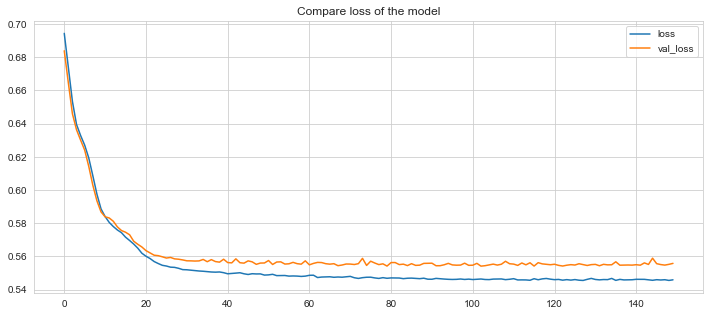

In [35]:
# model comparison of loss and accuracy between train and test 
model_loss = pd.DataFrame(model.history.history)
#model_loss[['accuracy','val_accuracy']].plot(figsize=(12,5), title='Compare accuracy of the model');
model_loss[['loss','val_loss']].plot(figsize=(12,5), title='Compare loss of the model');

In [37]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_val, y_val, verbose = 0 )

print("Train loss: ", training_score)
print("Validation loss: ", test_score)
#print("Train accuracy: ", training_score[1])
#print("Test accuracy: ", test_score[1])

Train loss:  0.5449145436286926
Validation loss:  0.5685315132141113


18/18 [==============================] - 0s 1ms/step
classification report:
                                  precision    recall  f1-score   support

           Difficulty_breathing       0.71      0.68      0.70       282
                        anaemia       0.75      0.62      0.68       306
arterial_pressure_NOS_decreased       0.72      0.73      0.73       313
                         nausea       0.67      0.66      0.66       265
                       neumonia       0.69      0.63      0.65       259

                      micro avg       0.71      0.67      0.69      1425
                      macro avg       0.71      0.66      0.69      1425
                   weighted avg       0.71      0.67      0.69      1425
                    samples avg       0.69      0.67      0.64      1425



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


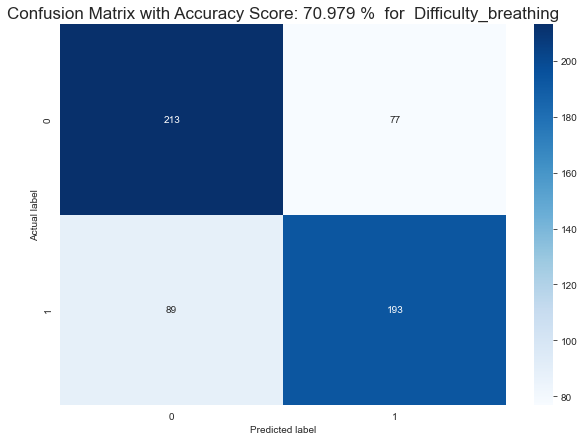

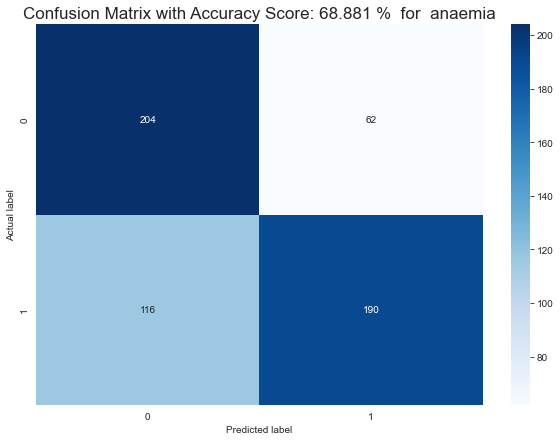

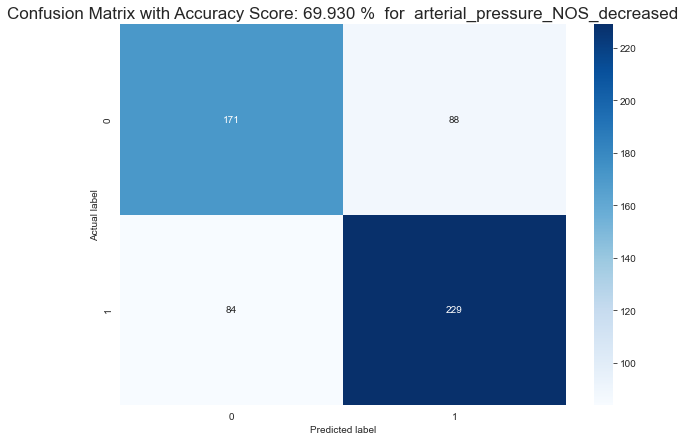

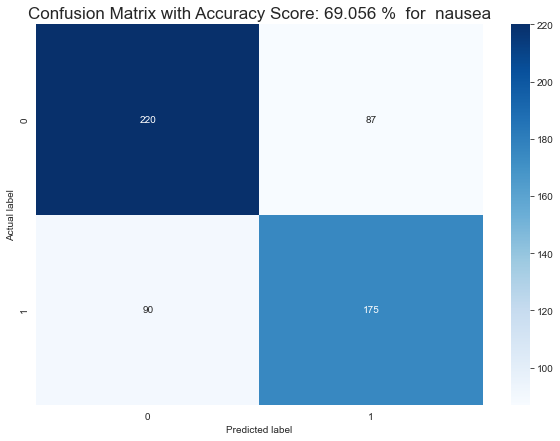

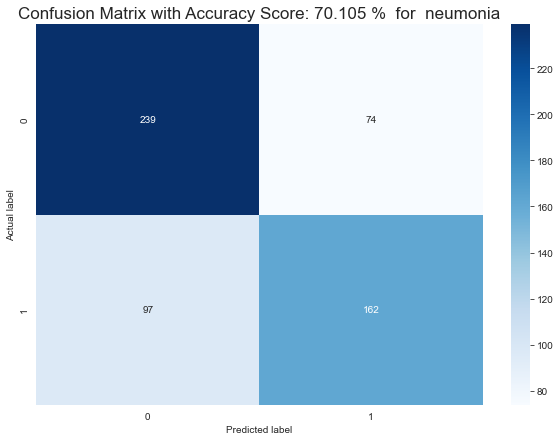

In [38]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# predict the classes
predictions = (model.predict(X_val) > 0.5).astype("int32")

def report(y_test, predictions, target):
    print('classification report:\n',classification_report(y_test,predictions, target_names=target))
    
    # confusion matrix on heatmap
    matrix = multilabel_confusion_matrix(y_test,predictions)
    for i,j in enumerate(matrix):
        plt.figure(figsize=(10,7))
        sns.heatmap(j, annot=True,fmt="d",cmap='Blues')#, annot=True, fmt='.5g', cmap = 'Blues_r', xticklabels=target, yticklabels=target);
        plt.ylabel('Actual label');
        plt.xlabel('Predicted label');
        title = f'Confusion Matrix with Accuracy Score: {accuracy_score(y_test[:,i],predictions[:,i])*100:.3f} %  for  {target[i]}'
        plt.title(title, size = 17);

report(y_val, predictions, list(Y.columns))